<a href="https://colab.research.google.com/github/rpasquini/econometria/blob/main/ejercicios/TP1_gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicios de Revisión de conceptos Econometría y práctica Python  

Les propongo un set de datos y un conjunto de preguntas de manera de repasar contenidos del curso y practicar la implementación de modelos en Python.

Antes de comenzar instalaremos la siguiente libreria:

In [ ]:
!pip install geopandas
import geopandas as gpd

# Cargando los datos de departamentos
Para este ejercicio vamos a analizar datos  de anuncios de alquiler para el período mayo-2019 mayo2020. Provienen de [Properati data](https://www.properati.com.ar/data/)

El siguiente codigo levanta un geodataframe. Tiene funciones asociadas similares a las del dataframe de pandas, pero incorpora de manera adicional algunas relacionadas a la caracteristica espacial de los datos


In [ ]:
import geopandas as gpd
import requests
from io import BytesIO
from zipfile import ZipFile

# Step 1: Download the ZIP file
url = "https://github.com/rpasquini/urban-econometrics/blob/master/data/deptos_amba_0519_0520.zip?raw=true"
response = requests.get(url)
zip_file = BytesIO(response.content)

# Step 2: Extract the contents of the ZIP file
with ZipFile(zip_file, 'r') as z:
    z.extractall("temp_shapefile")

# Step 3: Read the shapefile using GeoPandas
shapefile_path = "temp_shapefile/deptos_amba_0519_0520.shp"
data = gpd.read_file(shapefile_path)

# Display the GeoDataFrame
data.head()


,Unnamed_ 0,type,type_i18n,country,id,start_date,end_date,created_on,place,developmen,...,l5,l6,balcon,terraza,amenities,patio,distanciaC,adjustedpr,postcovid,geometry
0,3,Propiedad,Propiedad,Argentina,"b'\xa7\xe3\xfde\x9b\xbb;\x98\x07\xe1\xb6,Lzt\t'",2019-07-28,2019-08-05,2019-07-28,"{'lat': -34.603431, 'lon': -58.423872, 'l1': '...",None,...,None,None,1,0,0,0,3876.440082,18640.418739,0,POINT (103561.702 102915.336)
1,4,Propiedad,Propiedad,Argentina,b'G?A\xc2\xee\xb2\n\x8a\x13\xc2\xc9cR\x94fY',2019-07-28,2019-08-05,2019-07-28,"{'lat': -34.605963, 'lon': -58.425287, 'l1': '...",None,...,None,None,1,0,0,1,4016.571113,13980.314054,0,POINT (103431.800 102634.495)
2,5,Propiedad,Propiedad,Argentina,b'\xf5\x15\xde\xd6*\xf9\xc5g\x89\x8f\x7f\xac\x...,2019-07-28,2019-08-29,2019-07-28,"{'lat': -34.59085, 'lon': -58.416338, 'l1': 'A...",None,...,None,None,1,1,1,0,3474.707547,21436.481550,0,POINT (104253.439 104310.727)
3,6,Propiedad,Propiedad,Argentina,b'v\xf3\x9f\xa5\x8a\xc4I-X\xe6\x8d7\x87\x12\x1...,2019-07-28,2019-08-21,2019-07-28,"{'lat': -34.590953, 'lon': -58.417252, 'l1': '...",None,...,None,None,1,0,0,0,3547.285569,32620.732794,0,POINT (104169.580 104299.339)
4,7,Propiedad,Propiedad,Argentina,b'\xdc\x19\x86f+;-g\xdf\xea\xa7\xb9\xdf7\x8eV',2019-07-28,2019-08-10,2019-07-28,"{'lat': -34.567934, 'lon': -58.433226, 'l1': '...",None,...,None,None,1,0,1,0,6153.767781,18174.408271,0,POINT (102704.807 106853.505)


<Axes: >

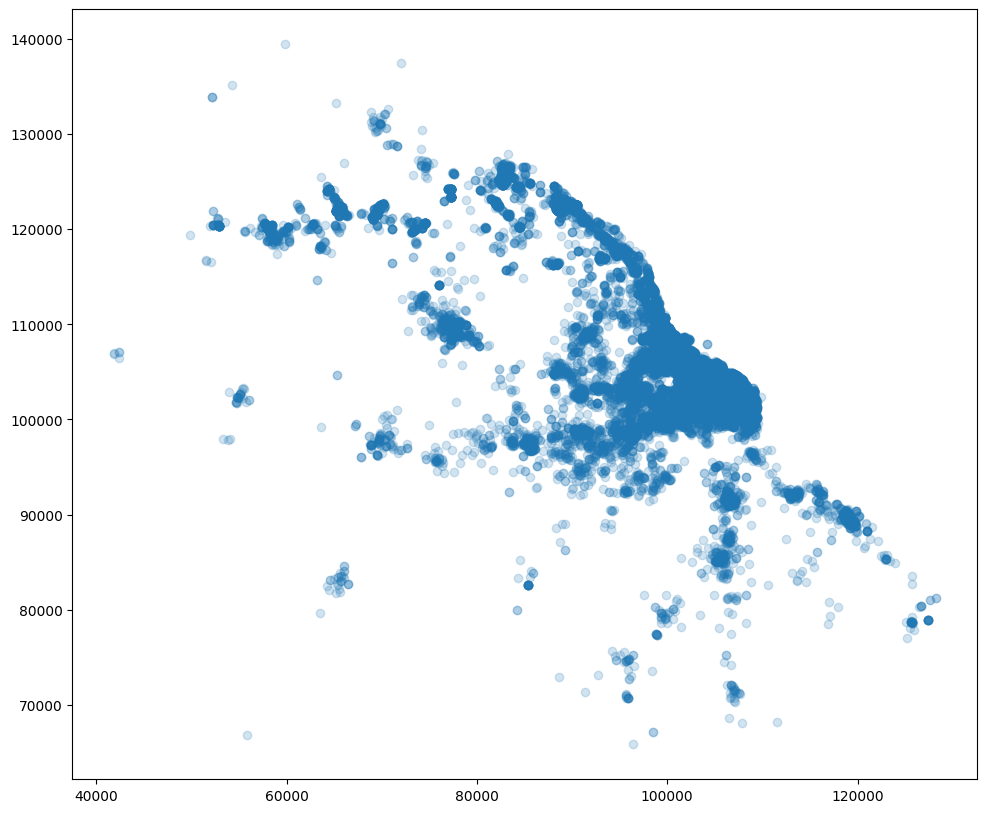

In [ ]:
# Podemos ver que los datos se corresponden con el AMBA
data.plot(alpha=0.2, figsize=(20, 10))

# Descripción de los datos que utilizará




*price*: alquiler mensual en pesos. \
*balcon*: True si tiene anuncio menciona que el departamento tiene balcón. \
*terraza*:	True si tiene anuncio menciona que el departamento tiene terraza. \
*amenities*: True si tiene anuncio menciona que el departamento tiene amenities (SUM, pileta, parrilla). \
*distanciaCBD*: Distancia al Obelisco en metros. \
*adjustedprice*: Alquier mensual a valores de Mayo 2019 (ajustado por inflación) \
*postcovid*: Dummy igual a 1 si el dato es posterior a 15 de Marzo 2020 \
*l2*: Variable categórica de macro regiones, incluye: 'Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Oeste', 'Buenos Aires Interior'
